<a href="https://colab.research.google.com/github/wizardcalidad/linear_regression/blob/main/LinearRegressionNoteBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAR REGRESSION NOTEBOOKS

### Prepared By: Qoyum Olatunde Yusuf

## Importing Necessary Libraries

In [33]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings( "ignore" )

## Loading The Dataset

The Problem statement:

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper.
The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that
sale?

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df['sales'].shape

(200,)

In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Checking for mising datas

In [7]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

## Let's try to show the relationship between Sales and the features

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


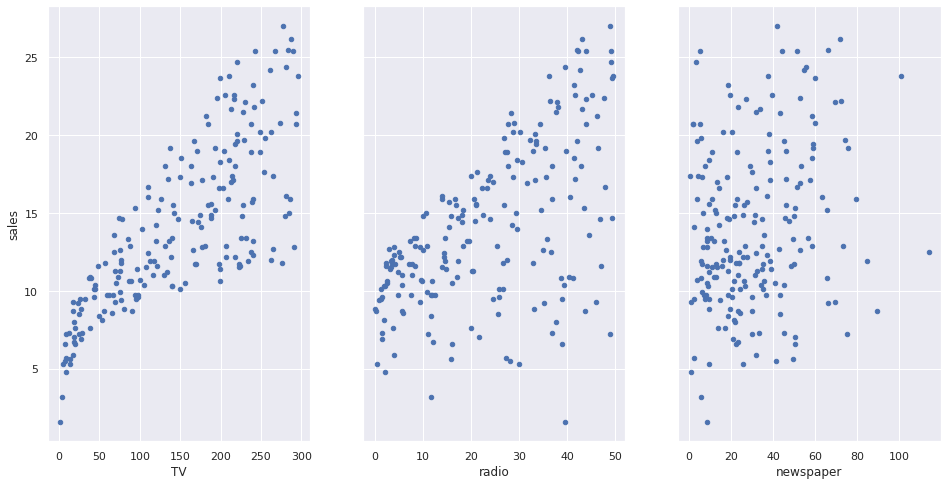

In [8]:
fig, axs = plt.subplots(1,3, sharey=True)

df.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

R-squared is used to check how fit our data is in the model, however, it represents the explainabilty of the data to the model. How much is the data being explained to the model.

It increases with increase in number of features or independent variables. To avoid this problem, adjusted R-sqaured will be used instead because it penalizes excessive use of such features which do not correlate with the output data.

## SImple Linear Regression

In demonstrating simple linear regression, let's see how well TV ads can predict the sales.

In [9]:
tv = ['TV']

In [10]:
X = df[tv]
y = df.sales

In [11]:
lm = LinearRegression()

In [12]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## printing intercept and coefficients

Intercept is the average value of the response variable or target if all the preedictors value are set to zero.

coeficient is the ratio of increase of the target with respect to the selected feature(s).

In [13]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


We can say a unit increase in TV ads will give rise to 0.0475 unit increase in Sales.

then, if 100 dollars is spent on TV ads, the increase in sales will be

**100 x 0.0475 = 4.75** increase in sales

## prediction using the model

If the expense on TV ad is $50000, what will be the sales prediction for that market?

In [14]:
X_new = pd.DataFrame({'TV':[50]})

In [15]:
X_new

,TV
0,50


In [16]:
lm.predict(X_new)

array([9.40942557])

result to the sales of 9,409 widgets in the market.

## plotting least squares line

the line of best for our model 

In [17]:
X_new = pd.DataFrame({'TV':[df.TV.min(), df.TV.max()]})

In [18]:
X_new

,TV
0,0.7
1,296.4


In [19]:
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

plotting the observed data and plot the least square line

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


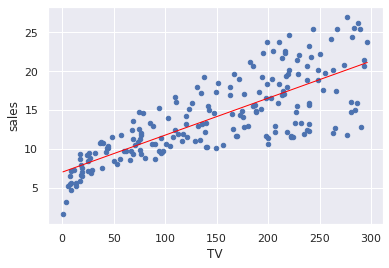

In [20]:
df.plot(kind='scatter', x='TV', y='sales')
plt.plot(X_new, preds, c='red', linewidth=1)

In [21]:
lm = smf.ols(formula='sales ~ TV', data=df).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


## Model Confidence

Linear Regression is a High bias/low variance model. Even after repeated sampling, the best fit line will stay roughly in
the same position (low variance), but the average of the models created after repeated sampling won't do a
great job in capturing the perfect relationship (high bias). Low variance is helpful when we don't have less
training data!
If the model has calculated a 95% confidence for our model coefficients, it can be interpreted as follows: If the
population from which this sample is drawn, is sampled 100 times, then approximately 95 (out of 100) of
those confidence intervals shall contain the "true" coefficients.

## Hypothesis Testing and p-values

The conventional hypothesis test is as follows:

Null hypothesis: No relationship exists between TV advertisements and Sales (and hence 𝛽 1
equals
zero).

Alternative hypothesis: There exists a relationship between TV advertisements and Sales (and hence, 𝛽 1
is not equal to zero).

How do we test this? We reject the null hypothesis (and thus believe the alternative hypothesis) if the 95%
confidence interval does not include zero. The p-value represents the probability of the coefficient actually
being zero.


In [22]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

the p-value for TV ads is way less than 0.05, and so we believe that there is a relationship
between TV advertisements and Sales.

## How Well Does the Model Fit the data?

We will compute this by sing R-square. The value of R-squared lies between 0 and 1. A value closer to 1 is better as it means that more variance is
explained by the model.

In [23]:
lm.rsquared

0.611875050850071

*If we are going to check it on multiple dataset in case of multiple linear regression, it is as simple as having multiple predictors or features*

## Multiple Linear Regression

In [24]:
feature_cols = ['TV', 'radio', 'newspaper']

X = df[feature_cols]
y = df.sales

In [25]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print(lm.intercept_)
print(lm.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


Since the coeeficient of the *newspaper* is negative, It means that the money spent for newspaper advertisements is not contributing in a positive way to
the sales.

In [34]:
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           1.58e-96
Time:                        10:18:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summary

TV and Radio have positive p-values, whereas Newspaper has a negative one. Hence, we can reject the
null hypothesis for TV and Radio that there is no relation between those features and Sales, but we fail to
reject the null hypothesis for Newspaper that there is no relationship between newspaper spends and
sales.

The expenses on bot TV and Radio ads are positively associated with Sales, whereas the expense on
newspaper ad is slightly negatively associated with the Sales.

This model has a higher value of R-squared (0.897) than the previous model, which means that this model
explains more variance and provides a better fit to the data than a model that only includes the TV.

## Feature Selection

R-squared increases with increase in features, therefore it is susceptible to model overfitting, and thus there is no guarantee that a model with a high R-
squared value will generalise.

### only include TV and Radio in the model

In [30]:
lm = smf.ols(formula='sales ~ TV + radio', data=df).fit()
lm.rsquared

0.8971942610828956

### add Newspaper to the model (which has no association with Sales)

In [31]:
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()
lm.rsquared

0.8972106381789522

## Final Note

Selecting the model with the highest value of R-squared is not a correct approach as the value of R-squared shall always increase whenever a new feature is taken for consideration even if the feature is unrelated to the response.

The alternative is to use adjusted R-squared which penalises the model complexity (to control overfitting), but this again generally

a better approach to feature selection is cross-validation. It provides a more reliable way to choose which of the created models will best generalise as it better estimates of out-of-sample error. An advantage is that the cross-validation method can be applied to any machine learning model and the scikit-learn package provides extensive functionality for that.

